# Examples for reading Herschel-SPIRE 250 $\mu$m maps

In [24]:
import os
import io
import gzip
from zipfile import ZipFile

import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import PercentileInterval, ImageNormalize


In [20]:
#
# where the zip file with all Herschel 250 micron maps are
#
wdir = os.path.join(os.path.expanduser('~'),'esabox/Work/ESAC_ML_WS2019/herschel_maps')
maps_zip = f'{wdir}/spire_maps_selected_fits.zip'
zipfile = ZipFile(maps_zip)

Select a random map and display it.

In [21]:
files = zipfile.namelist()
xfile = np.random.choice(files)
print (f"Will read {xfile}")

Will read maps_selected/1342256700_250_std2.fits.gz


In [22]:
f = zipfile.open(xfile)
hdu=fits.open(gzip.open(io.BytesIO(f.read())))

In [23]:
hdu.info()

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     164   ()      
  1  image         1 ImageHDU        56   (162, 192)   float32   


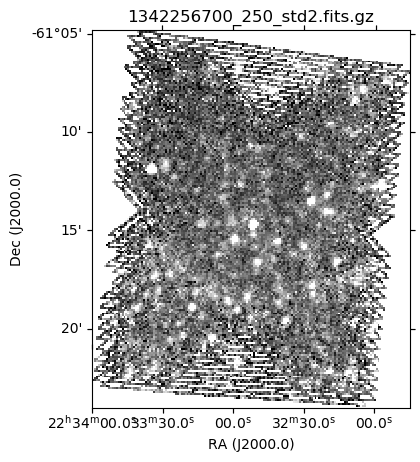

In [30]:
fig = plt.figure(figsize=(5,5),dpi=100)
pp = 95.0 # 
ximage = hdu['image']
wcs = WCS(hdu['image'].header)
ax = fig.add_subplot(111,projection=wcs)
ax.set_title(f'{os.path.basename(xfile)}')
lon = ax.coords['ra']
lon.set_axislabel('RA (J2000.0)')
lon.set_major_formatter('hh:mm:ss.s')
lat = ax.coords['dec']
lat.set_axislabel('Dec (J2000.0)')
lat.set_major_formatter('dd:mm')    
norm = ImageNormalize(ximage.data[~np.isnan(ximage.data)], interval=PercentileInterval(pp))
ax.imshow(ximage.data,norm=norm,cmap=plt.cm.gray,origin='lower',interpolation='nearest')
ax.set_autoscale_on(False);

## Examples for each of the classes

1. Spiral galaxy in the field
1. Deep extragalactic field
1. Galactic extended emission
1. Galactic cirrus emission

And some more complicated cases:

1. Spiral galaxy + cirrus
1. Deep field + cirrus
1. Edge-on spiral galaxy

**Note:** we do not have to use all these classifications, the easiest would be a binary classification in deep field and a field with extended emission.

In [31]:
obs = {"spiral":[1342182449,1342188775], "deep": [1342188658,1342185536], "extended": [1342183681,1342187718]}
#

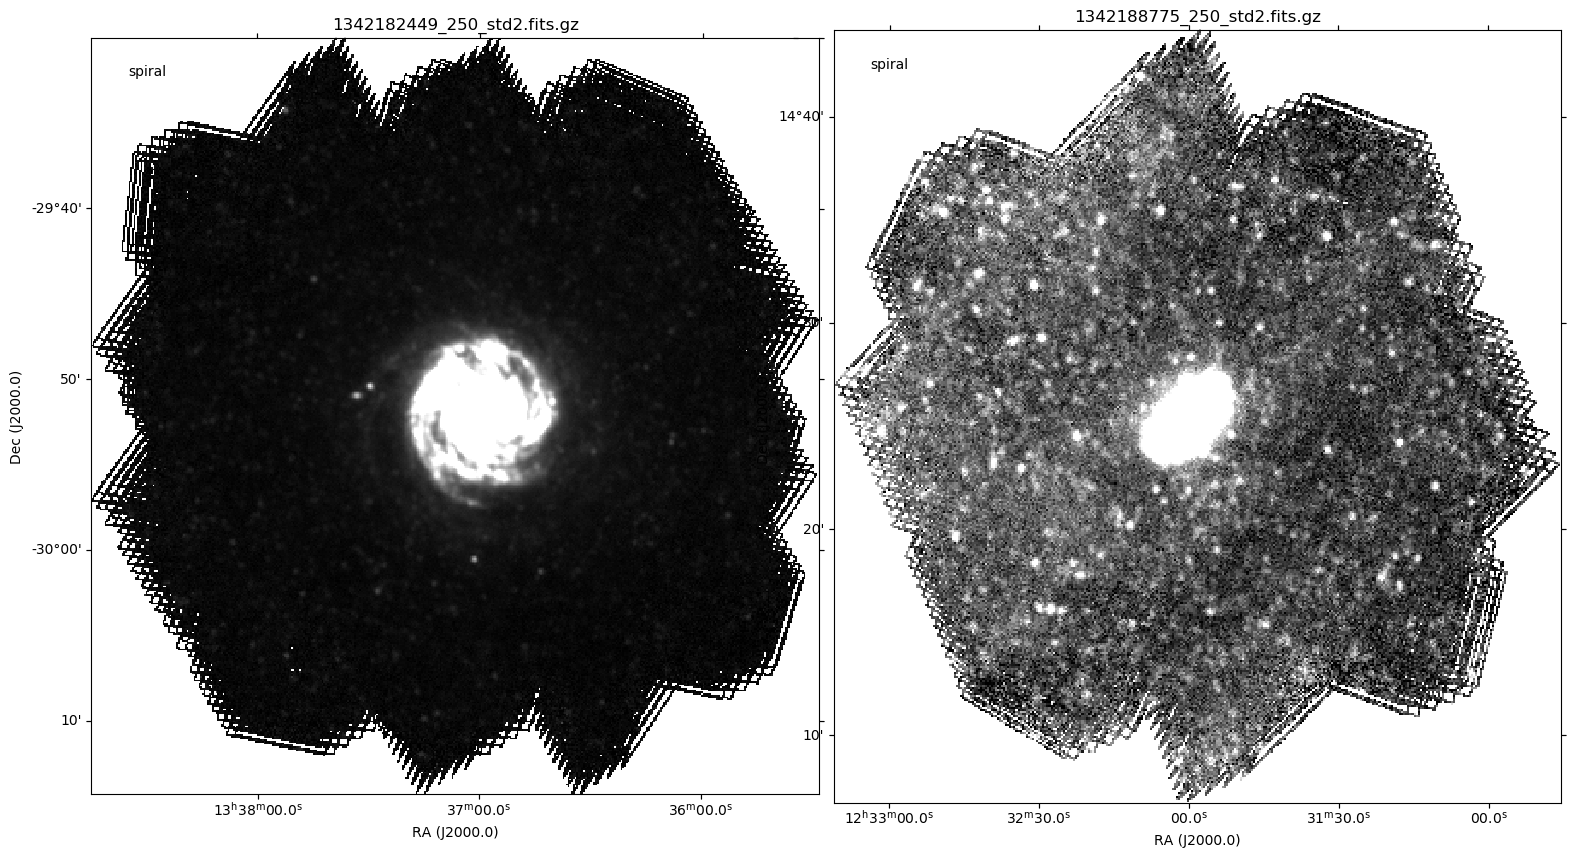

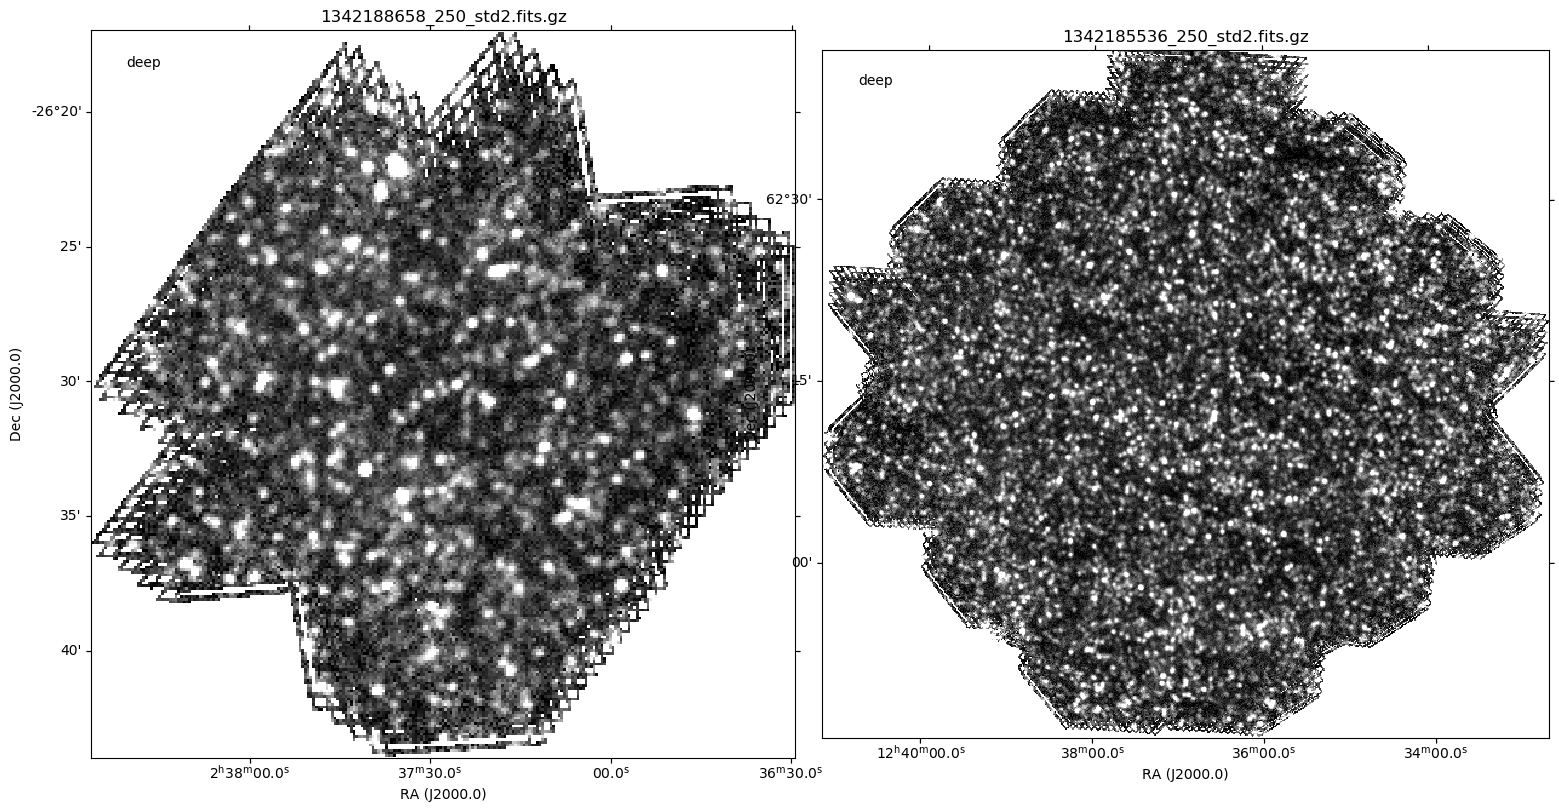

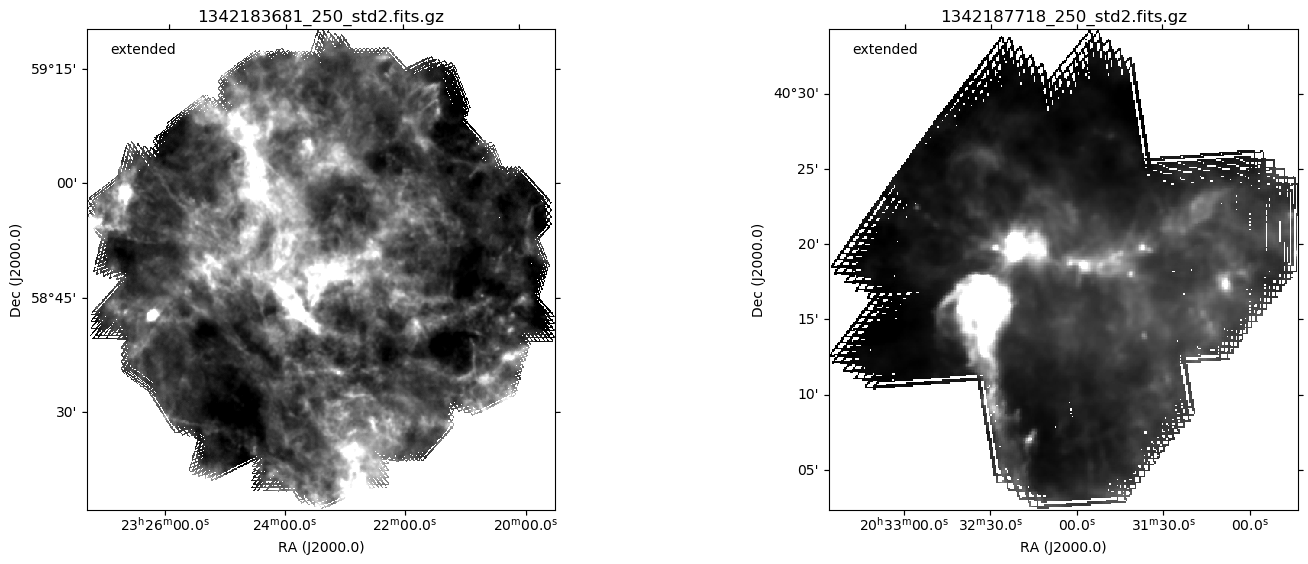

In [57]:
# we plot by class
nclass = len(obs.keys())
m = 1
for iclass in obs.keys():
    fig = plt.figure(figsize=(15,15),dpi=100)
    pp = 95.0 #
    k = 1
    for iobs in obs[iclass]:
        #
        # extract the images from the zip
        #
        nim = len(obs[iclass])
        for i,j in enumerate(files):
            if (str(iobs) in j):
                f = zipfile.open(j)
                hdu=fits.open(gzip.open(io.BytesIO(f.read())))            
                ximage = hdu['image']
                wcs = WCS(hdu['image'].header)
                #
                ax = fig.add_subplot(m,nim,k,projection=wcs)
                ax.set_title(f'{os.path.basename(j)}')
                lon = ax.coords['ra']
                lon.set_axislabel('RA (J2000.0)')
                lon.set_major_formatter('hh:mm:ss.s')
                lat = ax.coords['dec']
                lat.set_axislabel('Dec (J2000.0)')
                lat.set_major_formatter('dd:mm')    
                norm = ImageNormalize(ximage.data[~np.isnan(ximage.data)], interval=PercentileInterval(pp))
                ax.imshow(ximage.data,norm=norm,cmap=plt.cm.gray,origin='lower',interpolation='nearest')
                ax.text(0.05,0.95,iclass,transform = ax.transAxes)
                ax.set_autoscale_on(False);
                k += 1
        plt.tight_layout()
    m += 1
